In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
reviews = pd.read_csv('/content/drive/My Drive/reviews_trial.csv')

In [6]:
reviews.head(20)

,Unnamed: 0,business_id,name,stars,review_count,review_id,user_id,review_stars,text,date
0,0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,6W0MQHmasK0IsaoDo4bmkw,2K62MJ4CJ19L8Tp5pRfjfQ,3,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,BeeBfUxvzD4qNX4HxrgA5g,A0kENtCCoVT3m7T35zb2Vg,3,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,A1D2kUnZ0HTroFreAheNSg,SuOLY03LW5ZcnynKhbTydA,3,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,2pf45Stf-pNew-xgTababQ,lymyUak6KNcNKoDbK87MiQ,1,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,RHhlmL07evgAdPaXQV8Omg,6vU0I5XgCv9OQHZ76rV6qw,4,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
5,5,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,fhbL1BO2TCYKpoDLf-3mcg,nyL_LfmAaf15o8aj7WHnPw,4,"I've been a frequent at this place for years, ...",2016-08-13 20:31:21
6,6,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,TD5E5NTFqgi1LPbTLlRCjQ,-ga7pQvnJcMB1_pIapHQRQ,3,We chose this restaurant for our Chinese New Y...,2015-02-17 00:10:02
7,7,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,4Sg_ziTcrYlGO0dVyj2V3g,agqWketq-FhYwVmRyli4jA,1,I went at 230 on a Monday. It was dimsum \n\nI...,2017-01-02 20:32:29
8,8,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,PNF0KXB9-RJMveiLvgkASw,02AgiiwLg_XAhkvG-wGZKQ,3,My family and I were at Emerald yesterday duri...,2016-01-18 17:49:39
9,9,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,2.5,128,ijWqxLnjOo9LZpxOVGgCnw,paYZw5wsS25IzzBZtijB8A,4,"Because we are in Mississauga, I think this pl...",2015-08-20 03:31:45


In [0]:
neg_rev = reviews[(reviews['review_stars']==1)|(reviews['review_stars']==2)]

In [8]:
neg_rev[['name','review_count']].groupby(['name']).count().sort_values('review_count', ascending = False).head(55)

,review_count
name,
Luxor Hotel and Casino Las Vegas,2029
MGM Grand Hotel,1613
Circus Circus Las Vegas Hotel and Casino,1598
Bacchanal Buffet,1593
Rio All Suites Hotel & Casino,1260
Wicked Spoon,1240
The Buffet at Bellagio,1131
Mandalay Bay Resort & Casino,1049
Stratosphere,1016


In [0]:
mgm = neg_rev[(neg_rev['name'] == 'The Buffet at Bellagio')|
(neg_rev['name'] == 'Gordon Ramsay Pub & Grill')|
(neg_rev['name'] == 'Pampas Churrascaria Brazilian Grille')|
(neg_rev['name'] == 'Bacchanal Buffet')|
(neg_rev['name'] == 'Guy Fieri\'s Vegas Kitchen & Bar')|
(neg_rev['name'] == 'Spice Market Buffet')|
(neg_rev['name'] == 'The Buffet at ARIA')|
(neg_rev['name'] == 'Wahlburgers')|
(neg_rev['name'] == 'Tom\'s Urban')]

In [10]:
mgm

,Unnamed: 0,business_id,name,stars,review_count,review_id,user_id,review_stars,text,date
35147,35147,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,1,We had dinner at the Bellagio Buffet last nigh...,2013-12-07 00:14:06
35149,35149,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,aYSR8tO4kBqk0f6_ZYM2Zw,3BBiuiNLFuA-0Z4RE2UoQA,2,Went for Saturday Brunch. Wait was doable comp...,2017-02-09 04:48:06
35150,35150,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,gCLbUG4PnhwhBKR_5jARjw,7zphSXBrxDGChNlNkoGSng,2,Having dined at many other Vegas buffets (the ...,2010-07-07 16:03:41
35157,35157,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,QHn-GipFW_WFcUabN55Row,4lng77gRdpRb24o91sSihA,2,My gf suggested we eat here because they have ...,2013-04-10 19:17:57
35159,35159,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,pEmtQurWH73WkWt46ek1mw,0zqXX2SG7UiInTtU3JhWlg,2,"Of all the buffets at the casinos in Vegas, th...",2008-08-18 19:32:26
...,...,...,...,...,...,...,...,...,...,...
2303116,2303116,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,yPisy1gUBeZTQooGVEpgkg,jb5RFzFGZCns17Eah0GNLg,2,I went to this place to avoid further walking ...,2018-10-23 20:41:42
2303119,2303119,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,eYXbWv6xhnQBvvGHmNstdg,wcp4mREVtefF4-PAqw6w6Q,1,I came here for Sunday Brunch before heading b...,2010-08-17 20:08:44
2303120,2303120,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,2NU7Q9hkK9cJhRW7E1Twvw,B9CEu0PRVYyq6JeoJGCbdQ,1,My biggest mistake to wait an hour for their l...,2018-06-18 00:17:57
2303121,2303121,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,GoCtq_-D7qn-fd6hmQ5GpA,Seac5ruRa6WrA-wNJkrt4w,2,I came here for the first time last summer and...,2014-11-28 04:59:58


In [11]:
import nltk
nltk.download('punkt')


from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def text_clean(text):
    text = text.lower()  #lowercase
    words = nltk.word_tokenize(text)    #tokenize
    new_words= [word for word in words if word.isalpha()]   #Remove punctuations and numbers
    nostop = [words for words in new_words if words not in stop_words]    #Remove stopwords
    #nopos = [words for words in nostop if words not in positive_words] 
    lema = [lemmatizer.lemmatize(words) for words in nostop]   #lemmatize words
    nn = " ".join(lema)
    return(nn)

In [13]:
mgm['text'] = mgm['text'].map(text_clean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
mgm

,Unnamed: 0,business_id,name,stars,review_count,review_id,user_id,review_stars,text,date
35147,35147,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,1,dinner bellagio buffet last night service serv...,2013-12-07 00:14:06
35149,35149,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,aYSR8tO4kBqk0f6_ZYM2Zw,3BBiuiNLFuA-0Z4RE2UoQA,2,went saturday brunch wait doable compare buffe...,2017-02-09 04:48:06
35150,35150,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,gCLbUG4PnhwhBKR_5jARjw,7zphSXBrxDGChNlNkoGSng,2,dined many vega buffet wynn paris mirage etc f...,2010-07-07 16:03:41
35157,35157,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,QHn-GipFW_WFcUabN55Row,4lng77gRdpRb24o91sSihA,2,gf suggested eat better food suppose implied h...,2013-04-10 19:17:57
35159,35159,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,pEmtQurWH73WkWt46ek1mw,0zqXX2SG7UiInTtU3JhWlg,2,buffet casino vega worst yet bad theme through...,2008-08-18 19:32:26
...,...,...,...,...,...,...,...,...,...,...
2303116,2303116,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,yPisy1gUBeZTQooGVEpgkg,jb5RFzFGZCns17Eah0GNLg,2,went place avoid walking regret hugely disappo...,2018-10-23 20:41:42
2303119,2303119,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,eYXbWv6xhnQBvvGHmNstdg,wcp4mREVtefF4-PAqw6w6Q,1,came sunday brunch heading back cali great wee...,2010-08-17 20:08:44
2303120,2303120,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,2NU7Q9hkK9cJhRW7E1Twvw,B9CEu0PRVYyq6JeoJGCbdQ,1,biggest mistake wait hour le mediocre low qual...,2018-06-18 00:17:57
2303121,2303121,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,GoCtq_-D7qn-fd6hmQ5GpA,Seac5ruRa6WrA-wNJkrt4w,2,came first time last summer truly disappointed...,2014-11-28 04:59:58


In [0]:
rev = mgm['text']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(mgm['text'].values.astype('U'))

In [17]:
doc_term_matrix

<7930x8414 sparse matrix of type '<class 'numpy.int64'>'
	with 356543 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(mgm['text'].values.astype('U'))
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [0]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

In [0]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
      print("Topic %d:" % (topic_idx))
      print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


In [21]:
no_top_words = 10

display_topics(nmf, tfidf_feature_names, no_top_words)


Topic 0:
buffet food price quality better vega selection bellagio good worth
Topic 1:
service table food drink server meat minute came place restaurant
Topic 2:
line wait hour long waiting time people minute pay waited
Topic 3:
burger fry cheese mac ordered guy good bacon cold flavor
Topic 4:
crab leg rib king prime meat good seafood sushi snow


In [0]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(mgm['text'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

In [0]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [24]:
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
meat salad bar good like chicken egg bacon breakfast cheese
Topic 1:
food line place service time wait buffet hour price people
Topic 2:
burger food good fry place ordered restaurant like gordon service
Topic 3:
buffet food crab good like leg dessert really selection vega
Topic 4:
table minute drink server time asked came food said service


In [25]:
mgm

,Unnamed: 0,business_id,name,stars,review_count,review_id,user_id,review_stars,text,date
35147,35147,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,1,dinner bellagio buffet last night service serv...,2013-12-07 00:14:06
35149,35149,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,aYSR8tO4kBqk0f6_ZYM2Zw,3BBiuiNLFuA-0Z4RE2UoQA,2,went saturday brunch wait doable compare buffe...,2017-02-09 04:48:06
35150,35150,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,gCLbUG4PnhwhBKR_5jARjw,7zphSXBrxDGChNlNkoGSng,2,dined many vega buffet wynn paris mirage etc f...,2010-07-07 16:03:41
35157,35157,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,QHn-GipFW_WFcUabN55Row,4lng77gRdpRb24o91sSihA,2,gf suggested eat better food suppose implied h...,2013-04-10 19:17:57
35159,35159,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,pEmtQurWH73WkWt46ek1mw,0zqXX2SG7UiInTtU3JhWlg,2,buffet casino vega worst yet bad theme through...,2008-08-18 19:32:26
...,...,...,...,...,...,...,...,...,...,...
2303116,2303116,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,yPisy1gUBeZTQooGVEpgkg,jb5RFzFGZCns17Eah0GNLg,2,went place avoid walking regret hugely disappo...,2018-10-23 20:41:42
2303119,2303119,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,eYXbWv6xhnQBvvGHmNstdg,wcp4mREVtefF4-PAqw6w6Q,1,came sunday brunch heading back cali great wee...,2010-08-17 20:08:44
2303120,2303120,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,2NU7Q9hkK9cJhRW7E1Twvw,B9CEu0PRVYyq6JeoJGCbdQ,1,biggest mistake wait hour le mediocre low qual...,2018-06-18 00:17:57
2303121,2303121,LR0qF0FEVsCOhYWUOiH26A,The Buffet at ARIA,3.0,2297,GoCtq_-D7qn-fd6hmQ5GpA,Seac5ruRa6WrA-wNJkrt4w,2,came first time last summer truly disappointed...,2014-11-28 04:59:58


In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import PorterStemmer

In [27]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['come','order','try','go','get','make','drink','plate','dish','restaurant','place',
                  'would','really','like','great','service','came','got'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
    
def get_corpus(df):
    
    words = list(df['text'])
    words = remove_stopwords(words)
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram, words

train_corpus, train_id2word, bigram_train, words = get_corpus(mgm)

In [29]:
words

[['dinner',
  'bellagio',
  'buffet',
  'last',
  'night',
  'server',
  'kind',
  'forgot',
  'towards',
  'end',
  'visit',
  'food',
  'cold',
  'good',
  'thing',
  'crab',
  'leg',
  'suppose',
  'cold',
  'taco',
  'freshly',
  'made',
  'food',
  'single',
  'lamp',
  'heat',
  'food',
  'let',
  'server',
  'know',
  'food',
  'cold',
  'told',
  'manager',
  'charge',
  'ask',
  'problem',
  'said',
  'going',
  'talk',
  'chief',
  'idea',
  'actually',
  'happened',
  'though',
  'see',
  'half',
  'buffet',
  'closed',
  'well',
  'many',
  'option',
  'must',
  'say',
  'rather',
  'rio',
  'buffet',
  'high',
  'end',
  'casino',
  'horrible',
  'experience'],
 ['went',
  'saturday',
  'brunch',
  'wait',
  'doable',
  'compare',
  'buffet',
  'paid',
  'standard',
  'vega',
  'buffet',
  'however',
  'everything',
  'underwhelming',
  'nothing',
  'stood',
  'selection',
  'price',
  'pay',
  'little',
  'extra',
  'recommend',
  'wicked',
  'spoon',
  'bachannal'],
 ['d

In [30]:
train_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1)],
 [(45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(2, 1),
  (35, 1),
  (46, 1),
  (61, 1),
  (63, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1

In [31]:
import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


lda_train = gensim.models.ldamulticore.LdaMulticore(
                        corpus=train_corpus,
                        num_topics=5,
                        id2word=train_id2word,
                        chunksize=100,
                        workers=7, # Num. Processing Cores - 1
                        passes=50,
                        eval_every = 1,
                        per_word_topics=True)
lda_train.save('lda_train.model')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [32]:
lda_train.print_topics(5,num_words=15)


[(0,
  '0.022*"breakfast" + 0.015*"price" + 0.014*"brunch" + 0.013*"lunch" + 0.010*"went" + 0.010*"egg" + 0.009*"day" + 0.009*"time" + 0.007*"back" + 0.006*"bellagio" + 0.006*"coffee" + 0.006*"dinner" + 0.006*"visit" + 0.006*"quality" + 0.006*"cold"'),
 (1,
  '0.012*"dessert" + 0.009*"crab_leg" + 0.009*"one" + 0.009*"selection" + 0.007*"station" + 0.007*"seafood" + 0.007*"dinner" + 0.007*"better" + 0.007*"thing" + 0.006*"line" + 0.006*"quality" + 0.006*"prime_rib" + 0.006*"aria" + 0.006*"price" + 0.006*"sushi"'),
 (2,
  '0.023*"meat" + 0.013*"one" + 0.011*"eat" + 0.011*"vega" + 0.010*"price" + 0.010*"better" + 0.009*"even" + 0.009*"quality" + 0.009*"bad" + 0.007*"worst" + 0.007*"worth" + 0.007*"meal" + 0.006*"salad_bar" + 0.006*"ever" + 0.006*"free"'),
 (3,
  '0.018*"table" + 0.014*"time" + 0.013*"wait" + 0.012*"line" + 0.011*"one" + 0.010*"server" + 0.009*"back" + 0.009*"minute" + 0.009*"told" + 0.009*"said" + 0.009*"asked" + 0.008*"people" + 0.008*"hour" + 0.007*"seated" + 0.007*"man

In [0]:
rev = "Bad service, had to wait for one hour to get a table"

In [34]:
for idx, topic in lda_train.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.022*"breakfast" + 0.015*"price" + 0.014*"brunch" + 0.013*"lunch" + 0.010*"went" + 0.010*"egg" + 0.009*"day" + 0.009*"time" + 0.007*"back" + 0.006*"bellagio"
Topic: 1 Word: 0.012*"dessert" + 0.009*"crab_leg" + 0.009*"one" + 0.009*"selection" + 0.007*"station" + 0.007*"seafood" + 0.007*"dinner" + 0.007*"better" + 0.007*"thing" + 0.006*"line"
Topic: 2 Word: 0.023*"meat" + 0.013*"one" + 0.011*"eat" + 0.011*"vega" + 0.010*"price" + 0.010*"better" + 0.009*"even" + 0.009*"quality" + 0.009*"bad" + 0.007*"worst"
Topic: 3 Word: 0.018*"table" + 0.014*"time" + 0.013*"wait" + 0.012*"line" + 0.011*"one" + 0.010*"server" + 0.009*"back" + 0.009*"minute" + 0.009*"told" + 0.009*"said"
Topic: 4 Word: 0.027*"burger" + 0.017*"ordered" + 0.012*"fry" + 0.008*"cold" + 0.007*"menu" + 0.007*"one" + 0.006*"steak" + 0.006*"disappointed" + 0.006*"flavor" + 0.005*"meal"


In [98]:
for index, score in sorted(lda_train[train_corpus[43]][0], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic number: {}\t \nTopics: {}".format(score, index, lda_train.print_topic(index, 10)))


Score: 0.49847713112831116	 
Topic number: 2	 
Topics: 0.023*"meat" + 0.013*"one" + 0.011*"eat" + 0.011*"vega" + 0.010*"price" + 0.010*"better" + 0.009*"even" + 0.009*"quality" + 0.009*"bad" + 0.007*"worst"

Score: 0.44048482179641724	 
Topic number: 1	 
Topics: 0.012*"dessert" + 0.009*"crab_leg" + 0.009*"one" + 0.009*"selection" + 0.007*"station" + 0.007*"seafood" + 0.007*"dinner" + 0.007*"better" + 0.007*"thing" + 0.006*"line"

Score: 0.02043132111430168	 
Topic number: 0	 
Topics: 0.022*"breakfast" + 0.015*"price" + 0.014*"brunch" + 0.013*"lunch" + 0.010*"went" + 0.010*"egg" + 0.009*"day" + 0.009*"time" + 0.007*"back" + 0.006*"bellagio"

Score: 0.0204109288752079	 
Topic number: 4	 
Topics: 0.027*"burger" + 0.017*"ordered" + 0.012*"fry" + 0.008*"cold" + 0.007*"menu" + 0.007*"one" + 0.006*"steak" + 0.006*"disappointed" + 0.006*"flavor" + 0.005*"meal"

Score: 0.02019582875072956	 
Topic number: 3	 
Topics: 0.018*"table" + 0.014*"time" + 0.013*"wait" + 0.012*"line" + 0.011*"one" + 0.0

In [97]:
for index, score in sorted(lda_train[train_corpus[43]][0], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic number: {}".format(score, index))


Score: 0.4967260956764221	 
Topic number: 2

Score: 0.4422363340854645	 
Topic number: 1

Score: 0.0204312726855278	 
Topic number: 0

Score: 0.020410487428307533	 
Topic number: 4

Score: 0.020195836201310158	 
Topic number: 3


In [0]:
score1 = []
index1 = []
for index, score in sorted(lda_train[train_corpus[43]][0], key=lambda tup: -1*tup[1]):
    score1.append(score)
    index1.append(index)

Text(0.5, 1.0, 'Using LDA')

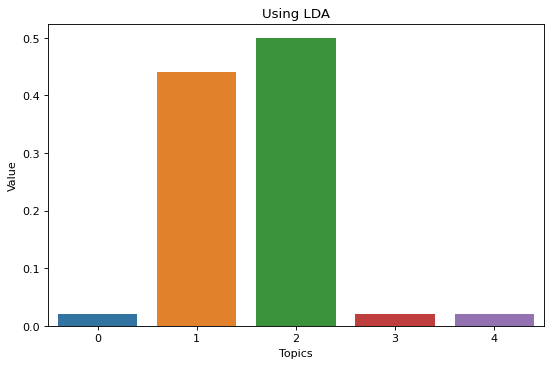

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')


ax = sns.barplot(
            x = index1
            ,y = score1
            )
ax.set(xlabel='Topics', ylabel='Value')
plt.title("Using LDA")


In [96]:
words[43]

['disappointing',
 'nothing',
 'tasty',
 'several',
 'thing',
 'inedible',
 'definitely',
 'worth',
 'money',
 'spent']

In [37]:
mgm.reset_index()['text'][43]

'really really disappointing nothing tasty several thing inedible definitely worth money spent'

In [67]:
mgm.reset_index()[43:63]

,index,Unnamed: 0,business_id,name,stars,review_count,review_id,user_id,review_stars,text,date
43,35316,35316,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,RC292qDi2pHXRoKhdOZzsA,c2-PAExCii1cxlYnz9s4VA,1,really really disappointing nothing tasty seve...,2013-12-08 23:14:08
44,35320,35320,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,8bkEKlgMPVmLOH_2GHBXuQ,S5-dwHxDx2ReoYQc6hEeAA,1,weekend dinner party price plus gratuity came ...,2017-08-08 06:00:55
45,35323,35323,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,XKg1BvjqQipF2znGIkoSDQ,W6vU0O1cwZX83QPbesi7DQ,2,little disappointed buffet service great selec...,2017-11-06 19:25:43
46,35324,35324,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,-hYL0dZpQmW5C3wTo3CHcQ,S0AfO9cVeqkIkFxye61muQ,2,sure happened bellagio buffet last year never ...,2018-05-29 15:54:59
47,35333,35333,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,CwMfTeuOlc3f_bM5mdAmNw,vZY-v0C3fSAJ5KhJBWNa3Q,1,favorite place went time last year getting wor...,2018-08-24 04:45:30
48,35336,35336,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,uDZjnP7RUz00kanjrLXlbA,X-NuzqOxc4HS2cUrapSt4A,1,boyfriend came dinner total ripoff meat carvin...,2010-10-09 23:28:59
49,35337,35337,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,00FJO7rO7t9_WTJn7IhNeA,Lzd7FTvMOvfg9WmR4MoNxg,2,impressive scale presentation yes one large ro...,2013-10-04 23:56:02
50,35338,35338,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,bR4363uEZsgqEzbYjQtwig,nEABfoTu6n6qvLRD2_mX1w,2,postponed writing review week buffet bellagio ...,2017-07-28 23:15:17
51,35346,35346,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,IoEfjFGOFtvYEM0odoxvpA,fuMLnjEjt3_GM5rc0XJY2Q,1,used greatest buffet strip ridiculous joke cle...,2018-06-09 07:06:38
52,35355,35355,ujHiaprwCQ5ewziu0Vi9rw,The Buffet at Bellagio,3.5,4227,9-FLMaSLJHKbAW0j5B_ECg,_hWkF2xhkDf9zhmt11iCVg,2,stayed bellagio brother rock n roll vega half ...,2017-01-03 00:08:59


In [0]:
main_score=[]
main_index=[]
for i in range(len(mgm.reset_index()['text'][43:63])):
  score1 = []
  index1 = []
  for index, score in sorted(lda_train[train_corpus[i]][0], key=lambda tup: -1*tup[1]):
      score1.append(score)
      index1.append(index)
  main_score.append(score1)
  main_index.append(index1)

In [72]:
main_score

[[0.44089046, 0.43315426, 0.117584385],
 [0.70208365, 0.26873392],
 [0.6939628, 0.18646778, 0.11084293],
 [0.7024261, 0.29217017],
 [0.4631968, 0.3881542, 0.13438939],
 [0.3458375, 0.32235035, 0.2894793, 0.03848002],
 [0.549932, 0.4254404],
 [0.49394405, 0.2202417, 0.17238589, 0.111536145],
 [0.86110014, 0.10058692, 0.0128370505, 0.012756252, 0.012719669],
 [0.56215405, 0.41602397],
 [0.73192704, 0.25782353],
 [0.8194467, 0.14644104, 0.011442969, 0.011360019, 0.011309323],
 [0.52064604, 0.4708703],
 [0.62435085, 0.2017114, 0.110041305, 0.06275887],
 [0.511865, 0.34834164, 0.10789246, 0.016167305, 0.015733551],
 [0.9452539, 0.013902607, 0.01364831, 0.013624835, 0.013570341],
 [0.90841466, 0.030610159, 0.020396624, 0.020301104, 0.020277498],
 [0.47610632, 0.36594212, 0.14626466],
 [0.677656, 0.2957463],
 [0.7002631, 0.14742513, 0.12032063, 0.029947845]]

In [73]:
main_index

[[1, 3, 0],
 [1, 0],
 [1, 0, 3],
 [1, 2],
 [1, 2, 3],
 [0, 1, 2, 4],
 [2, 1],
 [1, 3, 2, 4],
 [2, 3, 0, 1, 4],
 [1, 3],
 [1, 0],
 [1, 0, 2, 4, 3],
 [1, 2],
 [1, 4, 3, 2],
 [1, 0, 4, 3, 2],
 [1, 0, 4, 2, 3],
 [1, 2, 4, 3, 0],
 [1, 2, 3],
 [2, 0],
 [1, 2, 0, 4]]

In [0]:
topic_1 =[]
topic_2 =[]
topic_3 =[]
topic_4 =[]
topic_5 =[]
for i,j in zip(main_index, main_score):
  for k,m in zip(i,j):
    if k==0:
      topic_1.append(m) 

    elif k==1:
      topic_2.append(m) 

    elif k==2:
      topic_3.append(m) 

    elif k==3:
      topic_4.append(m) 

    elif k==4:
      topic_5.append(m) 

In [0]:
from statistics import mean 
length = len(mgm.reset_index()['text'][43:63])

topicX = [sum(topic_1)/length, sum(topic_2)/length, sum(topic_4)/length, sum(topic_5)/length,  sum(topic_3)/length]

In [104]:
topicX

[0.10671569439582526,
 0.5528739255387336,
 0.08664465956389904,
 0.0273846248164773,
 0.21746428017504513]

In [81]:
mean(topic_2)

0.28995237

In [82]:
mean(topic_3)

0.14440776

In [83]:
mean(topic_4)

0.06085472

In [84]:
mean(topic_5)

StatisticsError: ignored

Text(0.5, 1.0, "Average topic values of all reviews for 'The Buffet at Bellagio'")

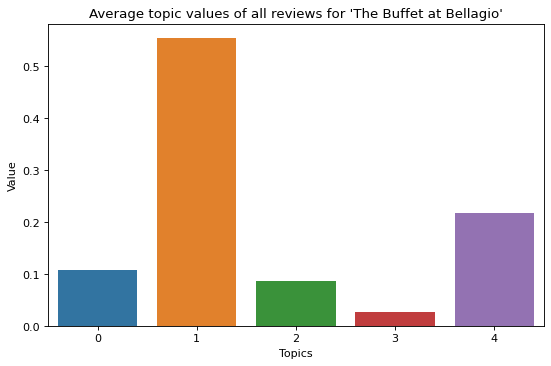

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')


ax = sns.barplot(
            x = [0,1,2,3,4]
            ,y = topicX
            )
ax.set(xlabel='Topics', ylabel='Value')
plt.title("Average topic values of all reviews for 'The Buffet at Bellagio'")

In [88]:
index1

[1, 2, 0, 4]